/Users/takaaki-suzuki/.pyenv/versions/3.6.5/envs/sklearn-test/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


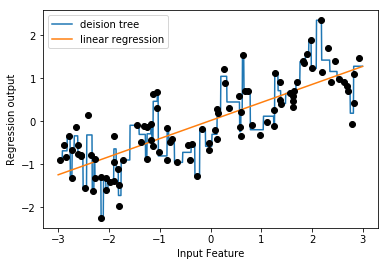

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
from matplotlib import pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='deision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input Feature')
plt.legend(loc='best')
plt.show()

In [3]:
#  線形モデルは1本の線になり、決定木ははるかに複雑なモデルになる。しかしこれはデータの表現に大きく依存する。
# 線形モデルを連続データに対してより強力にする方法の1つに特徴量のビニング、もしくは離散化がある。
# これは特徴量を複数の特徴量に分割する方法である
bins = np.linspace(-3, 3, 11)
print(f"bins: {bins}")

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [6]:
# 個々のデータポイントがどのビンに入るかを記録する
which_bin = np.digitize(X, bins=bins)
print(f"Data points:\n {X[:5]}")
print(f"Bin membership for data points:\n {which_bin[:5]}")

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)
print(X_binned[:5])
# 10ビンを指定しているので、変換されたデータセットX_binnedには10個の特徴量ができている
print(f"X_binned.shape: {X_binned.shape}")

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
X_binned.shape: (100, 10)


[-0.39794858  0.71057755]


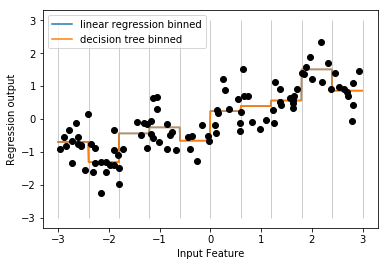

In [21]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

# 線形回帰と決定木が重なって同じ予測を行う事がわかる
# ビンごとに特徴量が一定になるので、どのようなモデルを持ってきても、ビンの中では同じ値を予測することになる
# 線形回帰は柔軟性があがり、決定木は柔軟性がさがる結果になるため、決定木でビニングをする利点はない（もともと、任意の場所でデータを分割して処理できるから）
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel('Regression output')
plt.xlabel('Input Feature')
plt.legend(loc='best')
plt.show()

In [18]:
# 特徴量表現がより豊かになるもうひとつの特徴として、特に線形モデルに有効なのが、
# 交互作用特徴量（interaction feature）と多項式特徴量(polynominal feature)を加える方法
# 特徴量エンジニアリングでは、統計モデルでよく用いられるが、多くの実用的な機械学習アプリケーションでも一般的に用いれれる

X_combined = np.hstack([X, X_binned])
print(X_combined[:1])
print(X_combined.shape)

[[-0.75275929  0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.        ]]
(100, 11)


[-0.60677253 -0.60838835 -0.61000417 -0.61161999 -0.61323581 -0.61485163
 -0.61646745 -0.61808327 -0.61969909 -0.62131491 -0.62293073 -0.62454655
 -0.62616237 -0.62777819 -0.62939401 -0.63100983 -0.63262565 -0.63424147
 -0.63585729 -0.63747311 -0.63908893 -0.64070475 -0.64232057 -0.64393639
 -0.64555221 -0.64716803 -0.64878385 -0.65039967 -0.65201549 -0.65363131
 -0.65524713 -0.65686295 -0.65847877 -0.66009459 -0.66171041 -0.66332623
 -0.66494205 -0.66655787 -0.66817369 -0.66978951 -0.67140533 -0.67302115
 -0.67463697 -0.67625279 -0.67786861 -0.67948443 -0.68110025 -0.68271607
 -0.68433189 -0.68594771 -0.68756353 -0.68917935 -0.69079517 -0.69241099
 -0.69402681 -0.69564263 -0.69725845 -0.69887427 -0.70049009 -0.70210591
 -0.70372173 -0.70533755 -0.70695337 -0.70856919 -0.71018501 -0.71180083
 -0.71341665 -0.71503247 -0.71664829 -0.71826411 -0.71987993 -0.72149575
 -0.72311157 -0.72472739 -0.72634321 -0.72795903 -0.72957485 -0.73119067
 -0.73280649 -0.73442231 -0.73603813 -0.73765395 -0

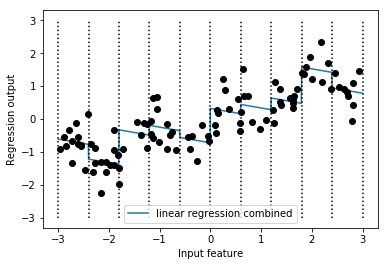

In [30]:
# 傾きは全て下向きで、ｓ全てのビンで共有されている
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [32]:
X_product = np.hstack([X_binned, X * X_binned])
# 特徴量の値とビンの場所の積を求める
print(X_product.shape)
print(X_product[:2])

(100, 20)
[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.75275929 -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          2.70428584]]


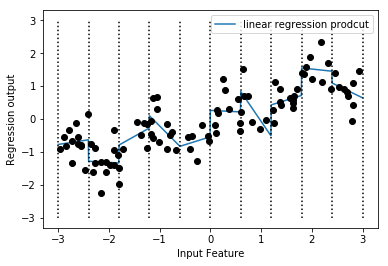

In [34]:
#ビンごとに傾きをもたせる
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression prodcut')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input Feature')
plt.legend(loc='best')
plt.show()

In [35]:
# もう一つの方法はもとの特徴量の多項式を使うことである
from sklearn.preprocessing import PolynomialFeatures

# x ** 10まで多項式を加える
#  デフォルトの 'include_bias=True' だと、常に1になる特徴量を加える
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

# 10を指定すると10次の特徴量ができる
print(f"X_poly.shape: {X_poly.shape}")

X_poly.shape: (100, 10)


In [37]:
print(f"Entries of X: \n {X[:5]}")
print(f"Entries of X_poly: \n {X_poly[:5]}")

Entries of X: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly: 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [38]:
# 個々の特徴量の意味を調べる
# 最初の要素はXと同じで、そのほかの要素は冪乗となっている
print(f"Polynomial feature name: {poly.get_feature_names()}")

Polynomial feature name: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


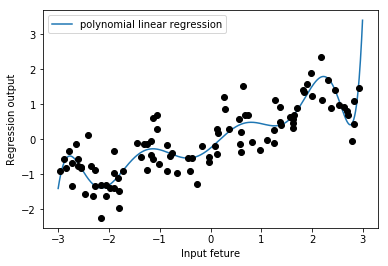

In [40]:
# 多項式特徴量と線形回帰モデルを組み合わせると、古典的な多項式回帰モデルになる
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feture')
plt.legend(loc='best')
plt.show()
